## TensorFlow - CNN
In this notebook we will train a **CNN** in TensorFlow to clasify Fashion - MNIST dataset.

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
#Load Fashion MNIST dataset
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train, y_train) , (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("Train X shape=",X_train.shape)
print("Test X shape=",X_test.shape)
print("Train Y shape=",y_train.shape)
print("Test Y shape=",y_test.shape)

Train X shape= (60000, 28, 28)
Test X shape= (10000, 28, 28)
Train Y shape= (60000,)
Test Y shape= (10000,)


In [5]:
# the data is only 2D!
# convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5590 - accuracy: 0.8044 - val_loss: 0.4272 - val_accuracy: 0.8429
Epoch 2/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4014 - accuracy: 0.8495 - val_loss: 0.4017 - val_accuracy: 0.8502
Epoch 3/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3629 - accuracy: 0.8634 - val_loss: 0.3527 - val_accuracy: 0.8685
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3356 - accuracy: 0.8728 - val_loss: 0.3565 - val_accuracy: 0.8701
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3180 - accuracy: 0.8796 - val_loss: 0.3415 - val_accuracy: 0.8744
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3068 - accuracy: 0.8832 - val_loss: 0.3852 - val_accuracy: 0.8546
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2885 - accuracy: 0.8920 - val_loss: 0.3538 -

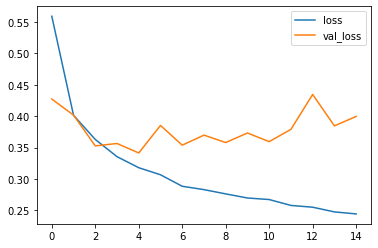

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

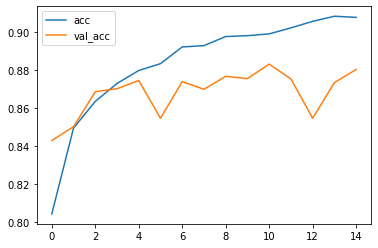

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()